# dacon computer vision practice

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
train_data = pd.read_csv('dacon computer vision digit/train.csv')

In [4]:
train_data.head(5)

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2


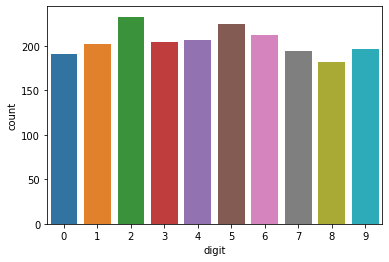

In [7]:
import seaborn as sns
sns.countplot(x='digit', data=train_data)

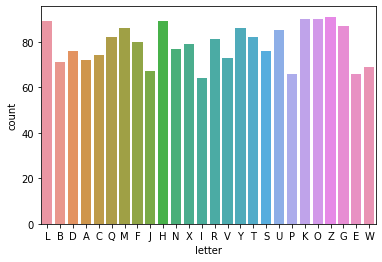

In [8]:
sns.countplot(x='letter', data=train_data)

In [9]:
X_train_pixel = train_data[train_data.columns[3:]]
X_train_letter = train_data[train_data.columns[2]]
y_train = train_data[train_data.columns[1]]

In [10]:
X_train_pixel

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,1,1,1,4,3,0,0,4,4,3,...,2,1,0,1,2,4,4,4,3,4
1,0,4,0,0,4,1,1,1,4,2,...,0,3,0,1,4,1,4,2,1,2
2,1,1,2,2,1,1,1,0,2,1,...,3,3,3,0,2,0,3,0,2,2
3,1,2,0,2,0,4,0,3,4,3,...,3,3,2,0,1,4,0,0,1,1
4,3,0,2,4,0,3,0,4,2,4,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2,4,3,4,2,4,4,1,2,1,...,0,2,2,0,0,1,3,1,4,0
2044,3,2,2,1,1,4,0,1,4,2,...,2,3,4,2,1,2,3,4,1,1
2045,4,0,4,0,2,4,4,4,3,4,...,2,3,1,1,3,4,2,2,0,0
2046,2,3,3,0,3,0,4,3,0,1,...,2,3,1,1,0,4,1,4,3,1


In [11]:
X_train_pixel_numpy = X_train_pixel.values

In [12]:
X_train_pixel_numpy.shape

(2048, 784)

In [16]:
X_train_pixel_image_numpy = X_train_pixel_numpy.reshape(-1,28,28)

5
L


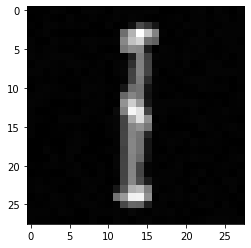

In [39]:
plt.imshow(X_train_pixel_image_numpy[0],cmap='gray')
print(y_train[0])
print(X_train_letter[0])
plt.show()

0
B


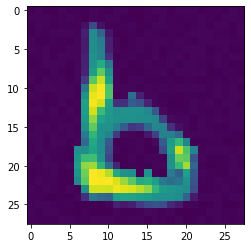

In [20]:
plt.imshow(X_train_pixel_image_numpy[1])
print(y_train[1])
print(X_train_letter[1])
plt.show()

4
L


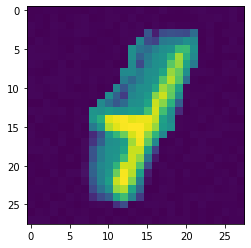

In [21]:
plt.imshow(X_train_pixel_image_numpy[2])
print(y_train[2])
print(X_train_letter[2])
plt.show()

9
D


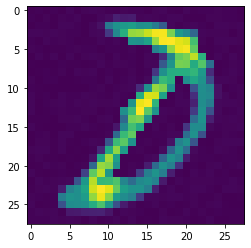

In [23]:
plt.imshow(X_train_pixel_image_numpy[3])
print(y_train[3])
print(X_train_letter[3])
plt.show()

6
A


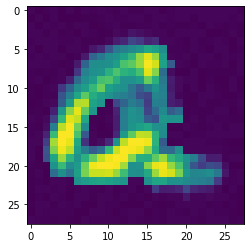

In [24]:
plt.imshow(X_train_pixel_image_numpy[4])
print(y_train[4])
print(X_train_letter[4])
plt.show()

In [25]:
import tensorflow as tf

/Users/h/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [269]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train_pixel_numpy)

(2048, 28, 28, 1)

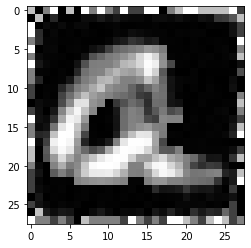

In [272]:
plt.imshow(X_train_scaled[4].reshape(28,28),cmap='gray')
X_train_scaled_reshaped = X_train_scaled.reshape(-1, 28, 28,1)
X_train_scaled_reshaped.shape

In [57]:
X_train_scaled_reshaped = X_train_scaled.reshape(-1, 28, 28,1)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [58]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])

In [63]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('emnist_cnn_checkpoint.h5', save_best_only=True)
earlystopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [64]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')
if not os.path.exists(root_logdir):
    os.mkdir(root_logdir)

In [65]:
def get_run_logdir(file_name):
    import time
    run_id = time.strftime('run_%Y_%m_%d_%H_%M_%S_{}'.format(file_name))
    return os.path.join(root_logdir, run_id)

run_log_dir = get_run_logdir('cnn_emnist')

In [68]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_log_dir)
history = model.fit(X_train_scaled_reshaped, y_train.values, epochs=100, 
                   validation_split=.2,
                   callbacks=[checkpoint_cb, earlystopping_cb, tensorboard_cb])

Train on 1638 samples, validate on 410 samples
Epoch 1/100
1638/1638 [==============================] - 7s 5ms/sample - loss: 2.3042 - accuracy: 0.1136 - val_loss: 2.3047 - val_accuracy: 0.0756
Epoch 2/100
1638/1638 [==============================] - 6s 3ms/sample - loss: 2.3017 - accuracy: 0.1142 - val_loss: 2.3051 - val_accuracy: 0.0756
Epoch 3/100
1638/1638 [==============================] - 6s 3ms/sample - loss: 2.3037 - accuracy: 0.1160 - val_loss: 2.3074 - val_accuracy: 0.0756
Epoch 4/100
1638/1638 [==============================] - 6s 3ms/sample - loss: 2.2990 - accuracy: 0.1264 - val_loss: 2.3061 - val_accuracy: 0.0902
Epoch 5/100
1638/1638 [==============================] - 6s 4ms/sample - loss: 2.3016 - accuracy: 0.1190 - val_loss: 2.3090 - val_accuracy: 0.0756
Epoch 6/100
1638/1638 [==============================] - 6s 4ms/sample - loss: 2.2998 - accuracy: 0.1227 - val_loss: 2.3099 - val_accuracy: 0.0756
Epoch 7/100
1638/1638 [==============================] - 6s 4ms/sample 

In [70]:
model.evaluate(X_train_scaled_reshaped, y_train.values)

2048/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.3009960390627384, 0.11376953]

In [71]:
X_train_letter

0       L
1       B
2       L
3       D
4       A
       ..
2043    V
2044    L
2045    A
2046    Z
2047    Z
Name: letter, Length: 2048, dtype: object

In [74]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
X_train_letter_one_hot = one_hot.fit_transform(X_train_letter.values.reshape(-1,1))

In [77]:
X_train_letter_one_hot = X_train_letter_one_hot.toarray()

In [115]:
input_image = tf.keras.layers.Input(shape=[28, 28, 1], name = 'image_input')
input_letter = tf.keras.layers.Input(shape=[26], name = 'letter_input')
convolution_conv2d_1 = tf.keras.layers.Conv2D(64, 7, activation='relu', padding='same')(input_image)
convolution_max_pool_2d_1 = tf.keras.layers.MaxPool2D(2)(input_image)
convolution_conv2d_2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(convolution_max_pool_2d_1)
convolution_conv2d_3 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(convolution_conv2d_2)
convolution_max_pool_2d_2 = tf.keras.layers.MaxPool2D(2)(convolution_conv2d_3)
convolution_conv2d_4 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(convolution_max_pool_2d_2)
convolution_conv2d_5 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(convolution_conv2d_4)
convolution_max_pool_2d_3 = tf.keras.layers.MaxPool2D(2)(convolution_conv2d_5)
image_after_convolution = tf.keras.layers.Flatten()(convolution_max_pool_2d_3)
concat_layer = tf.keras.layers.Concatenate()([image_after_convolution, input_letter])
hidden_layer1 = tf.keras.layers.Dense(128, activation='relu')(concat_layer)
dropout_1 = tf.keras.layers.Dropout(.3)(hidden_layer1)
hidden_layer2 = tf.keras.layers.Dense(64, activation='relu')(dropout_1)
dropout_2 = tf.keras.layers.Dropout(.3)(hidden_layer2)
output = tf.keras.layers.Dense(10, activation='softmax')(dropout_2)

In [116]:
model = tf.keras.Model(inputs=[input_image, input_letter], outputs=[output])

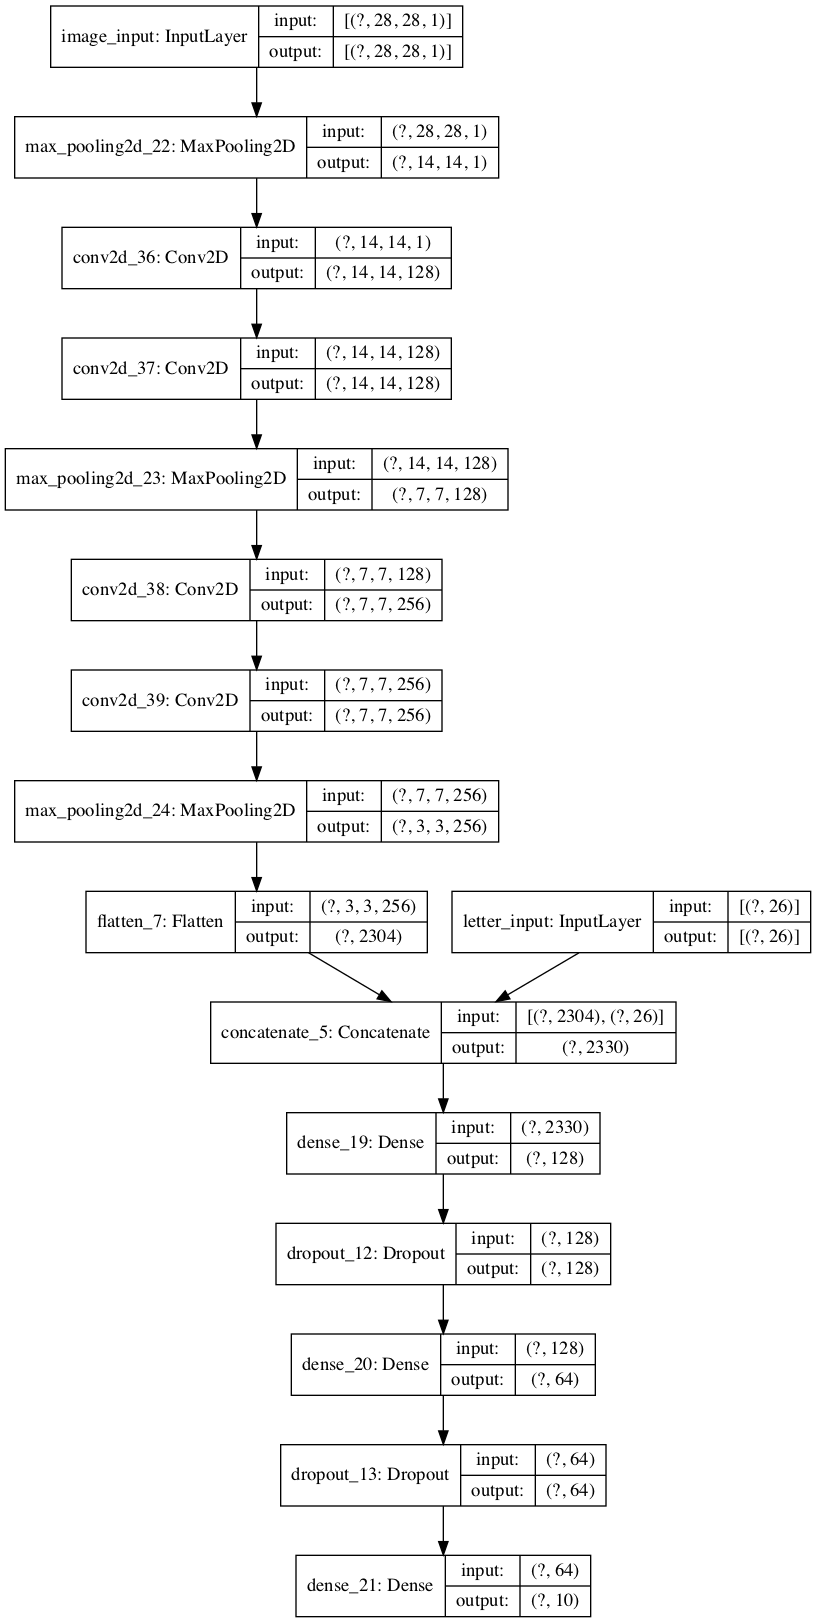

In [117]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [118]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])

In [119]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('emnist_cnn_input2_checkpoint_std_scaler_dropout_3.h5', save_best_only=True)
earlystopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [120]:
run_log_dir = get_run_logdir('cnn_input2_emnist_std_scaler)dropout_3')

In [121]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_log_dir)
history = model.fit([X_train_scaled_reshaped, X_train_letter_one_hot], y_train.values, epochs=100, 
                   validation_split=.2,
                   callbacks=[checkpoint_cb, earlystopping_cb, tensorboard_cb])

Train on 1638 samples, validate on 410 samples
Epoch 1/100
1638/1638 [==============================] - 6s 3ms/sample - loss: 2.3042 - accuracy: 0.1026 - val_loss: 2.3088 - val_accuracy: 0.0756
Epoch 2/100
1638/1638 [==============================] - 5s 3ms/sample - loss: 2.2950 - accuracy: 0.1325 - val_loss: 2.2457 - val_accuracy: 0.1634
Epoch 3/100
1638/1638 [==============================] - 5s 3ms/sample - loss: 2.1240 - accuracy: 0.2332 - val_loss: 1.9305 - val_accuracy: 0.3341
Epoch 4/100
1638/1638 [==============================] - 5s 3ms/sample - loss: 1.8376 - accuracy: 0.3394 - val_loss: 1.7565 - val_accuracy: 0.3659
Epoch 5/100
1638/1638 [==============================] - 5s 3ms/sample - loss: 1.6203 - accuracy: 0.4371 - val_loss: 1.7130 - val_accuracy: 0.3512
Epoch 6/100
1638/1638 [==============================] - 5s 3ms/sample - loss: 1.3842 - accuracy: 0.5183 - val_loss: 1.6063 - val_accuracy: 0.4537
Epoch 7/100
1638/1638 [==============================] - 4s 3ms/sample 

In [122]:
test_set = pd.read_csv('dacon computer vision digit/test.csv')

In [123]:
test_set

,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,22524,P,1,2,1,1,0,0,0,2,...,0,1,3,0,3,0,4,3,1,4
20476,22525,S,4,1,1,4,0,0,1,1,...,1,3,1,0,0,1,3,1,2,0
20477,22526,B,4,2,1,3,2,1,3,0,...,3,2,3,4,1,0,3,3,1,1
20478,22527,K,1,1,2,3,4,0,4,3,...,2,0,0,4,3,3,3,4,4,2


In [127]:
X_test_letter = test_set[test_set.columns[1]]
X_test_pixel = test_set[test_set.columns[2:]]


In [130]:
X_test_std = std_scaler.transform(X_test_pixel.values)
X_test_letter_one_hot = one_hot.transform(X_test_letter.values.reshape(-1,1))

In [134]:
X_test_std_reshape = X_test_std.reshape(-1,28,28,1)
X_test_std_reshape.shape

(20480, 28, 28, 1)

In [135]:
X_test_letter_one_hot.shape

(20480, 26)

In [136]:
y_pred = model.predict([X_test_std_reshape,X_test_letter_one_hot])

In [138]:
y_pred_class = y_pred.argmax(axis=1)

In [139]:
y_pred_class

array([8, 8, 8, ..., 8, 3, 8])

In [125]:
sample_submission = pd.read_csv('dacon computer vision digit/submission.csv')

In [140]:
sample_submission['digit'] = y_pred_class

In [141]:
sample_submission

,id,digit
0,2049,8
1,2050,8
2,2051,8
3,2052,2
4,2053,3
...,...,...
20475,22524,8
20476,22525,8
20477,22526,8
20478,22527,3


In [145]:
sample_submission.to_csv('test_2_input_layers.csv', index=False)

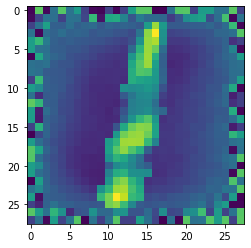

In [147]:
plt.imshow(X_test_std_reshape[0,:,:,0])

In [233]:
X_train_pixel_numpy_reshape = X_train_pixel.values.reshape(-1,28,28)

In [234]:
X_train_pixel_numpy_reshape.shape

(2048, 28, 28)

In [235]:
X_mean = X_train_pixel_numpy_reshape.mean(axis=0, keepdims=True)
X_std = X_train_pixel_numpy_reshape.std(axis=0, keepdims=True) + 1e-7
X_train_pixel_numpy_reshape = (X_train_pixel_numpy_reshape - X_mean) / X_std

In [236]:
X_train_pixel_numpy_reshape = X_train_pixel_numpy_reshape[..., np.newaxis]
X_train_pixel_numpy_reshape.shape

(2048, 28, 28, 1)

In [273]:
input_image = tf.keras.layers.Input(shape=[28, 28, 1], name = 'image_input')
input_letter = tf.keras.layers.Input(shape=[26], name = 'letter_input')
convolution_conv2d_1 = tf.keras.layers.Conv2D(64, 7, activation='relu', padding='same')(input_image)
convolution_max_pool_2d_1 = tf.keras.layers.MaxPool2D(2)(input_image)
convolution_conv2d_2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(convolution_max_pool_2d_1)
convolution_conv2d_3 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(convolution_conv2d_2)
convolution_max_pool_2d_2 = tf.keras.layers.MaxPool2D(2)(convolution_conv2d_3)
convolution_conv2d_4 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(convolution_max_pool_2d_2)
convolution_conv2d_5 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(convolution_conv2d_4)
convolution_max_pool_2d_3 = tf.keras.layers.MaxPool2D(2)(convolution_conv2d_5)
image_after_convolution = tf.keras.layers.Flatten()(convolution_max_pool_2d_3)
concat_layer = tf.keras.layers.Concatenate()([image_after_convolution, input_letter])
hidden_layer1 = tf.keras.layers.Dense(128, activation='relu')(concat_layer)
dropout_1 = tf.keras.layers.Dropout(.3)(hidden_layer1)
hidden_layer2 = tf.keras.layers.Dense(64, activation='relu')(dropout_1)
dropout_2 = tf.keras.layers.Dropout(.3)(hidden_layer2)
output = tf.keras.layers.Dense(10, activation='softmax', name='digit_output')(dropout_2)
hidden_layer_sub_output_1 = tf.keras.layers.Dense(128, activation='relu')(image_after_convolution)
dropout_sub_output_1 = tf.keras.layers.Dropout(.4)(hidden_layer_sub_output_1)
hidden_layer_sub_output_2 = tf.keras.layers.Dense(64, activation='relu')(dropout_sub_output_1)
dropout_sub_output_2 = tf.keras.layers.Dropout(.4)(hidden_layer_sub_output_2)
sub_output = tf.keras.layers.Dense(26, name='letter_output', activation='softmax')(dropout_sub_output_2)

In [274]:
model = tf.keras.Model(inputs=[input_image, input_letter], outputs=[output,sub_output])

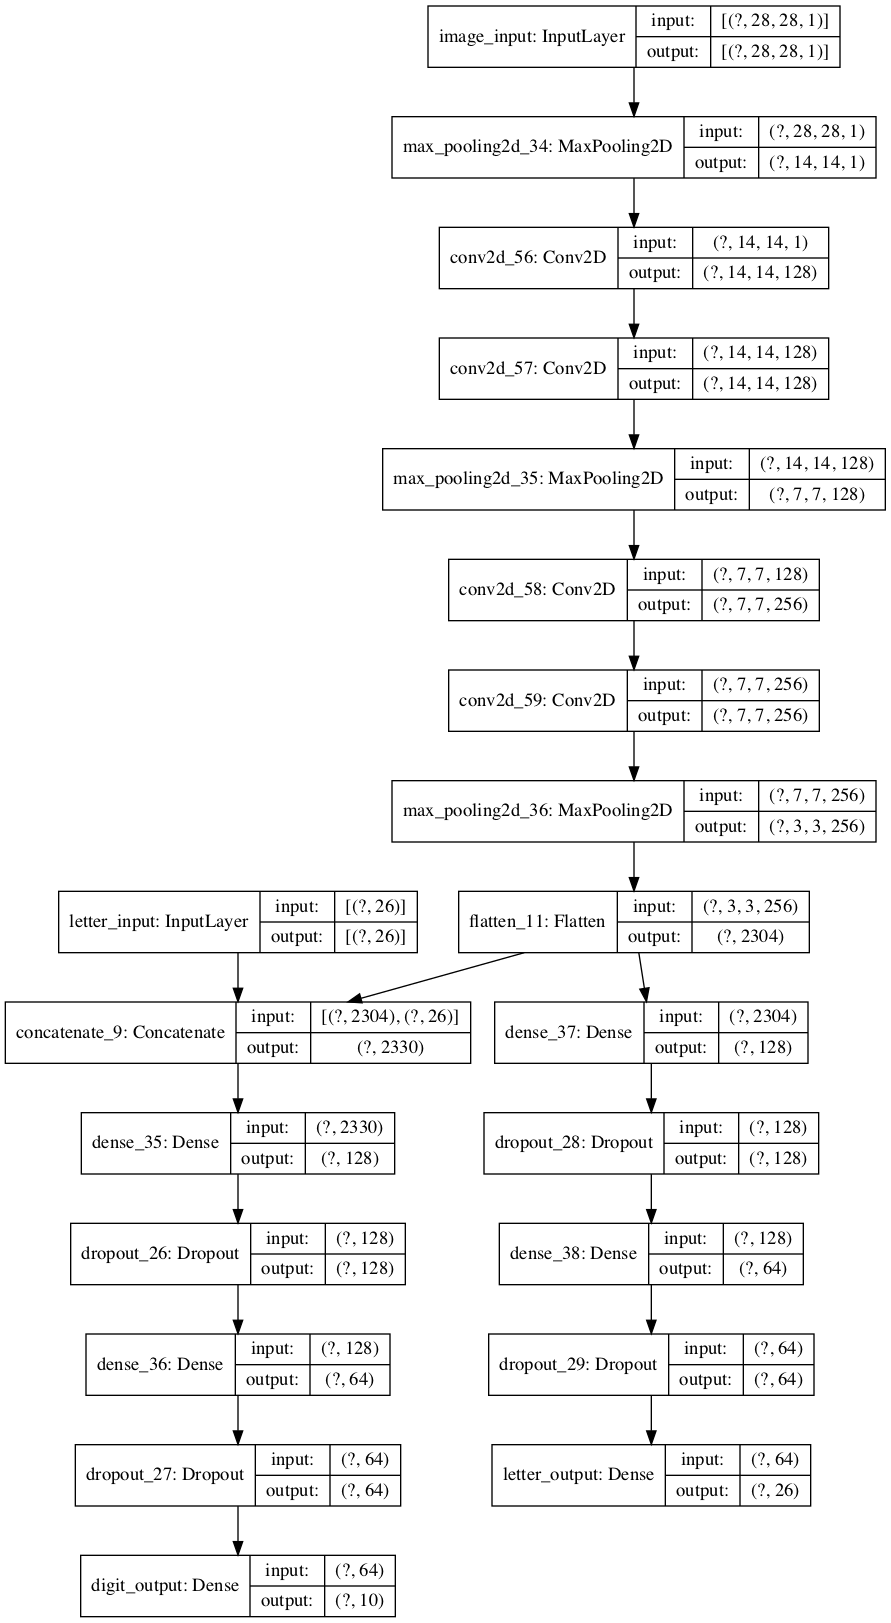

In [275]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [276]:
model.compile(loss=['sparse_categorical_crossentropy','categorical_crossentropy'],
             optimizer='adam',
              loss_weights=[.85, .15],
             metrics=['accuracy'])

In [277]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('emnist_cnn_input2_output2__minmax_checkpoint__dropout_4.h5', save_best_only=True)
earlystopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [278]:
run_log_dir = get_run_logdir('cnn_input2_output2_mminmax_emnist__dropout_4')

In [279]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_log_dir)
history = model.fit([X_train_scaled_reshaped, X_train_letter_one_hot], [y_train.values, X_train_letter_one_hot], epochs=100, 
                   validation_split=.2,
                   callbacks=[checkpoint_cb, earlystopping_cb, tensorboard_cb])

Train on 1638 samples, validate on 410 samples
Epoch 1/100
1638/1638 [==============================] - 5s 3ms/sample - loss: 2.4488 - digit_output_loss: 2.3055 - letter_output_loss: 3.2609 - digit_output_accuracy: 0.1129 - letter_output_accuracy: 0.0360 - val_loss: 2.4502 - val_digit_output_loss: 2.3076 - val_letter_output_loss: 3.2575 - val_digit_output_accuracy: 0.0756 - val_letter_output_accuracy: 0.0439
Epoch 2/100
1638/1638 [==============================] - 4s 3ms/sample - loss: 2.4416 - digit_output_loss: 2.2970 - letter_output_loss: 3.2570 - digit_output_accuracy: 0.1300 - letter_output_accuracy: 0.0421 - val_loss: 2.4498 - val_digit_output_loss: 2.3072 - val_letter_output_loss: 3.2578 - val_digit_output_accuracy: 0.0756 - val_letter_output_accuracy: 0.0439
Epoch 3/100
1638/1638 [==============================] - 4s 3ms/sample - loss: 2.4298 - digit_output_loss: 2.2856 - letter_output_loss: 3.2527 - digit_output_accuracy: 0.1270 - letter_output_accuracy: 0.0470 - val_loss: 2.4

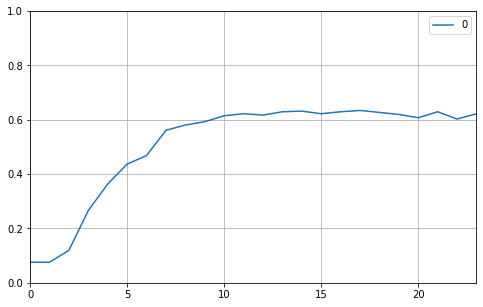

In [280]:
import pandas as pd

pd.DataFrame(history.history['val_digit_output_accuracy']).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(loc='best')
plt.show()


In [240]:
X_test_pixel_numpy_reshape = X_test_pixel.values.reshape(-1,28,28)

In [241]:
X_test_pixel_numpy_reshape = (X_test_pixel_numpy_reshape - X_mean) / X_std

In [242]:
X_test_pixel_numpy_reshape = X_test_pixel_numpy_reshape[..., np.newaxis]
X_test_pixel_numpy_reshape.shape

(20480, 28, 28, 1)

In [281]:
X_test_pixel.shape

(20480, 784)

In [282]:
X_test_pixel_scaled = min_max_scaler.transform(X_test_pixel)

In [283]:
X_test_pixel_scaled.shape

(20480, 784)

In [284]:
X_test_pixel_scaled_reshape = X_test_pixel_scaled.reshape(-1,28,28,1)

In [286]:
X_test_pixel_scaled_reshape.shape

(20480, 28, 28, 1)

In [287]:
y_pred = model.predict([X_test_pixel_scaled_reshape,X_test_letter_one_hot.toarray()])

In [288]:
y_pred_digit = y_pred[0]

In [289]:
y_pred_letter = y_pred[1]

In [290]:
y_pred_class = y_pred_digit.argmax(axis=1)

In [291]:
y_pred_class[:5]

array([6, 8, 1, 0, 3])

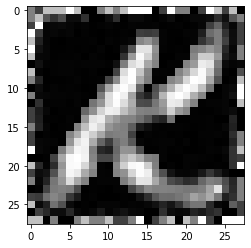

In [304]:
plt.imshow(X_test_pixel_scaled_reshape[3,:,:,0],cmap='gray')

In [294]:
y_pred_letter = y_pred_letter.argmax(axis=1)

In [295]:
y_pred_letter[:5]

array([11,  2, 18, 17, 20])

In [296]:
y_test_letter = X_test_letter_one_hot.toarray().argmax(axis=1)

In [297]:
from sklearn.metrics import accuracy_score

In [298]:
accuracy_score(y_test_letter, y_pred_letter)

0.228857421875

In [305]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_letter, y_pred_letter)

array([[ 65,   7,  23,   1,   4,   3,   1,  59,   0,   6,   7,   5, 137,
         82, 129,   0,  28,  29,  46,   0,  44,   0,  92,   3,   7,   2],
       [ 19,  60,  15,  39,   6,   7,   0,  88,   0,  68,  20,  42,   3,
         36,  88,   2,  28,   9, 146,   2,  34,   0,  76,   1,  12,   5],
       [  3,  22, 300,   0,  11,   1,   0,   8,   1,   8,  23,   4,  19,
         28, 143,   1,  16,  72,  52,   5,  14,   0,  16,   0,   7,   0],
       [ 19,  20,  44,  66,   7,   0,   0,  95,   1,  91,  10,  64,   7,
         24,  62,   0,   6,  18,  58,   4,  47,   0, 110,   1,  11,   2],
       [ 28,  29, 123,   0,  26,   2,   1,  12,   0,   2,  38,   4,  46,
         47, 158,   7,  35,  36, 111,   3,  29,   0,  15,   4,  14,   3],
       [ 24,   1,  11,   2,   0,  85,   2,  26,   2,  10,  10, 131,  65,
          4,  12, 147,  29, 169,   7,  46,   8,   1,  12,   5,  39,   2],
       [ 35,  14,  35,   7,   4,  21,   3,  32,   5,  20,   6,  21,  38,
         30, 149,   5,  74,  28,  96,  20,  2

In [306]:
sample_submission['digit'] = y_pred_class

In [307]:
sample_submission

,id,digit
0,2049,6
1,2050,8
2,2051,1
3,2052,0
4,2053,3
...,...,...
20475,22524,4
20476,22525,1
20477,22526,6
20478,22527,1


In [308]:
sample_submission.to_csv('test_2_input_output2_layers_with_min_max_scaler.csv', index=False)

In [258]:
a_data = train_data[train_data['letter']=='A']

In [259]:
a_data

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
17,18,7,A,2,3,0,4,0,0,1,...,1,2,0,0,1,0,2,2,1,4
44,45,5,A,2,0,4,2,3,1,3,...,3,1,2,0,4,2,3,4,1,1
75,76,7,A,1,0,4,1,4,1,1,...,0,4,0,4,3,2,4,1,2,2
105,106,2,A,4,2,4,1,0,4,3,...,0,2,0,2,4,3,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,1965,1,A,3,2,0,3,0,2,1,...,3,4,3,1,4,4,1,2,3,2
1967,1968,5,A,0,2,0,0,3,1,3,...,1,1,2,2,3,0,3,1,4,2
2010,2011,9,A,3,1,1,1,0,1,4,...,1,0,3,0,4,3,1,0,2,3
2011,2012,9,A,4,3,3,0,3,0,2,...,4,2,0,1,3,3,4,0,1,3


In [262]:
a_data_pixel = a_data[a_data.columns[3:]].values.reshape(-1,28,28)

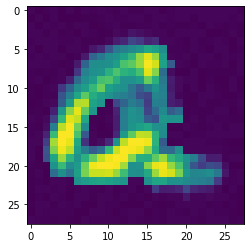

In [263]:
plt.imshow(a_data_pixel[0])

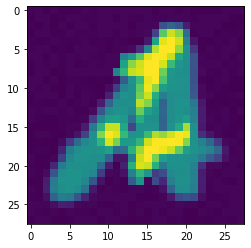

In [264]:
plt.imshow(a_data_pixel[1])

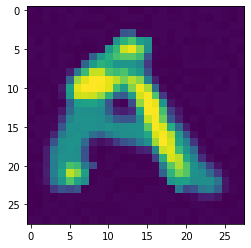

In [265]:
plt.imshow(a_data_pixel[2])

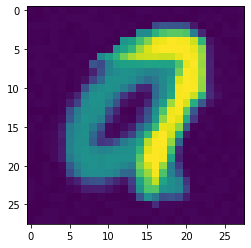

In [266]:
plt.imshow(a_data_pixel[3])

In [268]:
train_data.describe()

,id,digit,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,...,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,1024.500000,4.440918,2.031250,1.959961,1.971680,2.018066,1.988770,1.959473,2.041504,1.994629,...,2.034180,1.978516,1.972656,2.010742,1.958008,2.043457,2.035156,1.981445,1.993164,1.975586
std,591.350996,2.819159,1.420762,1.399057,1.415311,1.415307,1.419169,1.421730,1.420671,1.419548,...,1.420694,1.390359,1.407022,1.443575,1.415662,1.407484,1.399886,1.409247,1.392264,1.398719
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,512.750000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1024.500000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,1536.250000,7.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,2048.000000,9.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
